<a href="https://colab.research.google.com/github/rashmi1112/Tensorflow-for-AI-ML-and-DL/blob/main/CatsVsDogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## Downloading the file from the web
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-13 22:12:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 142.251.107.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   156MB/s    in 0.4s    

2022-01-13 22:12:15 (156 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

## Extracting the file contents from the zipped file
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
## Setting up base directory and creating sub-directories for storing the images

base_dir = './cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

## Setting up directory for training of cats and dogs labels

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs') 

## Setting up directory for validation of cats and dogs labels

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:
## Getting the images from the directory into python lists

train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.303.jpg', 'cat.159.jpg', 'cat.784.jpg', 'cat.32.jpg', 'cat.318.jpg', 'cat.769.jpg', 'cat.637.jpg', 'cat.31.jpg', 'cat.510.jpg', 'cat.677.jpg']
['dog.346.jpg', 'dog.264.jpg', 'dog.149.jpg', 'dog.7.jpg', 'dog.289.jpg', 'dog.105.jpg', 'dog.524.jpg', 'dog.281.jpg', 'dog.20.jpg', 'dog.901.jpg']


In [5]:
## Display a few images in the directory

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_rows = 4
img_cols = 4

pic_idx = 0

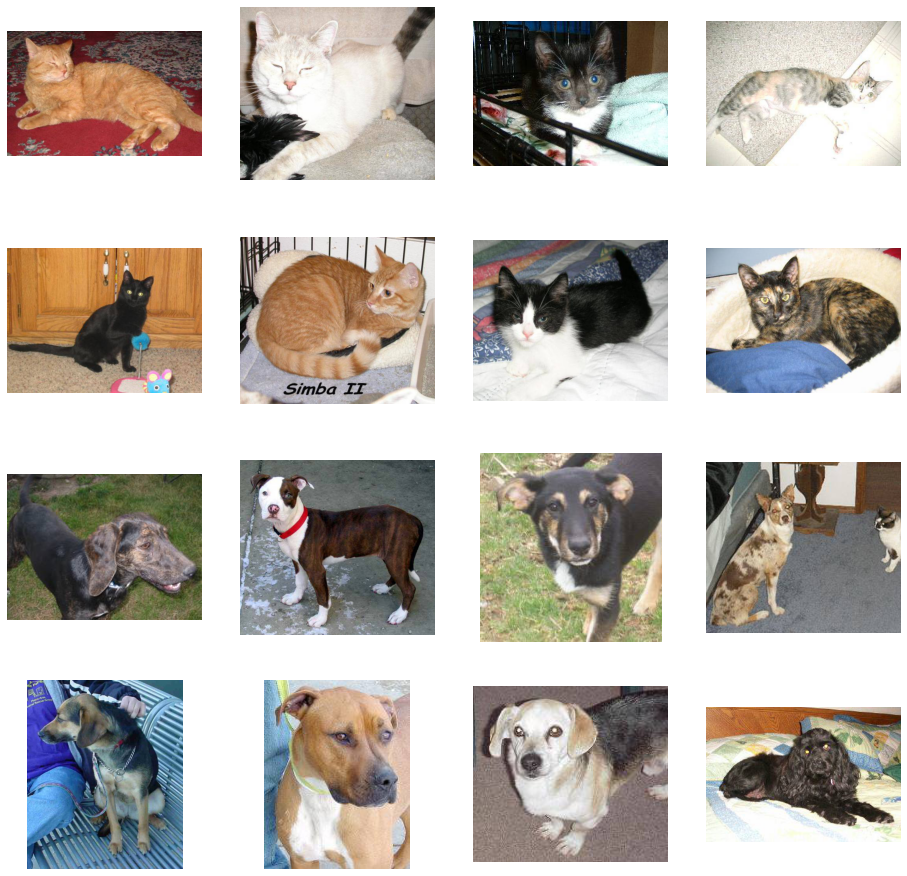

In [6]:
fig = plt.gcf()

# Setting up total figure size in matplotlib

fig.set_size_inches(img_rows*4, img_cols*4)

## Create a list of full path names of the images in the train_cats_dir/train_dogs_dir using the lists train_cats_fnames/train_dogs_fnames

next_cat_pix =  [os.path.join(train_cats_dir, fname) for fname in train_cats_fnames[pic_idx: pic_idx + 8]]

next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_fnames[pic_idx: pic_idx + 8]]

## Setting up subplots for individual images. Subplot indices start from 1
for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  sp = plt.subplot(img_rows, img_cols, i + 1)
  sp.axis('Off')      #to not show any grids or axis in the individual images
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
## Building a basic CNN model 

import tensorflow as tf
from tensorflow import keras

In [8]:
model = tf.keras.Sequential([keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
                             keras.layers.MaxPool2D(2,2),
                             keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                             keras.layers.MaxPool2D(2,2),
                             keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                             keras.layers.MaxPool2D(2,2),
                             keras.layers.Flatten(),
                             keras.layers.Dense(units = 512, activation = 'relu'),
                             keras.layers.Dense(1, activation = 'sigmoid')
                             ])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer= RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Rescaling all the pixel values of the images before feeding them to the network

training_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)

## Flowing images in the batch size 20 using training_datagen generator

training_generator = training_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150,150))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit(training_generator, validation_data=validation_generator, steps_per_epoch=100, epochs = 15, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 11s - loss: 0.9293 - accuracy: 0.5470 - val_loss: 0.7028 - val_accuracy: 0.5060 - 11s/epoch - 114ms/step
Epoch 2/15
100/100 - 8s - loss: 0.6377 - accuracy: 0.6535 - val_loss: 0.5917 - val_accuracy: 0.6950 - 8s/epoch - 80ms/step
Epoch 3/15
100/100 - 8s - loss: 0.5582 - accuracy: 0.7255 - val_loss: 0.5662 - val_accuracy: 0.7130 - 8s/epoch - 79ms/step
Epoch 4/15
100/100 - 8s - loss: 0.4984 - accuracy: 0.7595 - val_loss: 0.5702 - val_accuracy: 0.7160 - 8s/epoch - 80ms/step
Epoch 5/15
100/100 - 8s - loss: 0.4378 - accuracy: 0.7935 - val_loss: 0.5596 - val_accuracy: 0.7250 - 8s/epoch - 81ms/step
Epoch 6/15
100/100 - 8s - loss: 0.3716 - accuracy: 0.8375 - val_loss: 0.6129 - val_accuracy: 0.7200 - 8s/epoch - 82ms/step
Epoch 7/15
100/100 - 8s - loss: 0.2938 - accuracy: 0.8760 - val_loss: 0.7132 - val_accuracy: 0.7080 - 8s/epoch - 81ms/step
Epoch 8/15
100/100 - 8s - loss: 0.2228 - accuracy: 0.9000 - val_loss: 0.6849 - val_accuracy: 0.7320 - 8s/epoch - 80ms/step
Epoch 9/15
10

In [13]:
## Predicting images

import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (150,150))
  x= image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size = 10)

  print(classes[0])

  if classes[0] > 0:
    print(fn + "is a dog")
  else:
    print(fn + "is a cat")
    

Saving download.jfif to download (6).jfif
[0.]
download.jfifis a cat
